In [6]:
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
import datetime


In [7]:
end_date = datetime.date(2023,8,25)
start_date = end_date - pd.Timedelta(days = 365*10)

#Fetching stock data

yf.pdr_override()
df = pdr.get_data_yahoo('NVDA', start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-08-27,3.712500,3.737500,3.687500,3.700000,3.472501,27746400
2013-08-28,3.707500,3.735000,3.685000,3.700000,3.472501,31882400
2013-08-29,3.687500,3.727500,3.677500,3.692500,3.465461,27621600
2013-08-30,3.695000,3.705000,3.670000,3.687500,3.460768,37812000
2013-09-03,3.697500,3.742500,3.667500,3.690000,3.463115,28468000
...,...,...,...,...,...,...
2023-08-18,426.350006,435.779999,416.600006,432.989990,432.989990,58262200
2023-08-21,444.940002,470.649994,442.220001,469.670013,469.670013,69257300
2023-08-22,481.350006,481.869995,453.329987,456.679993,456.679993,75720700


In [8]:
df.shape

(2516, 6)

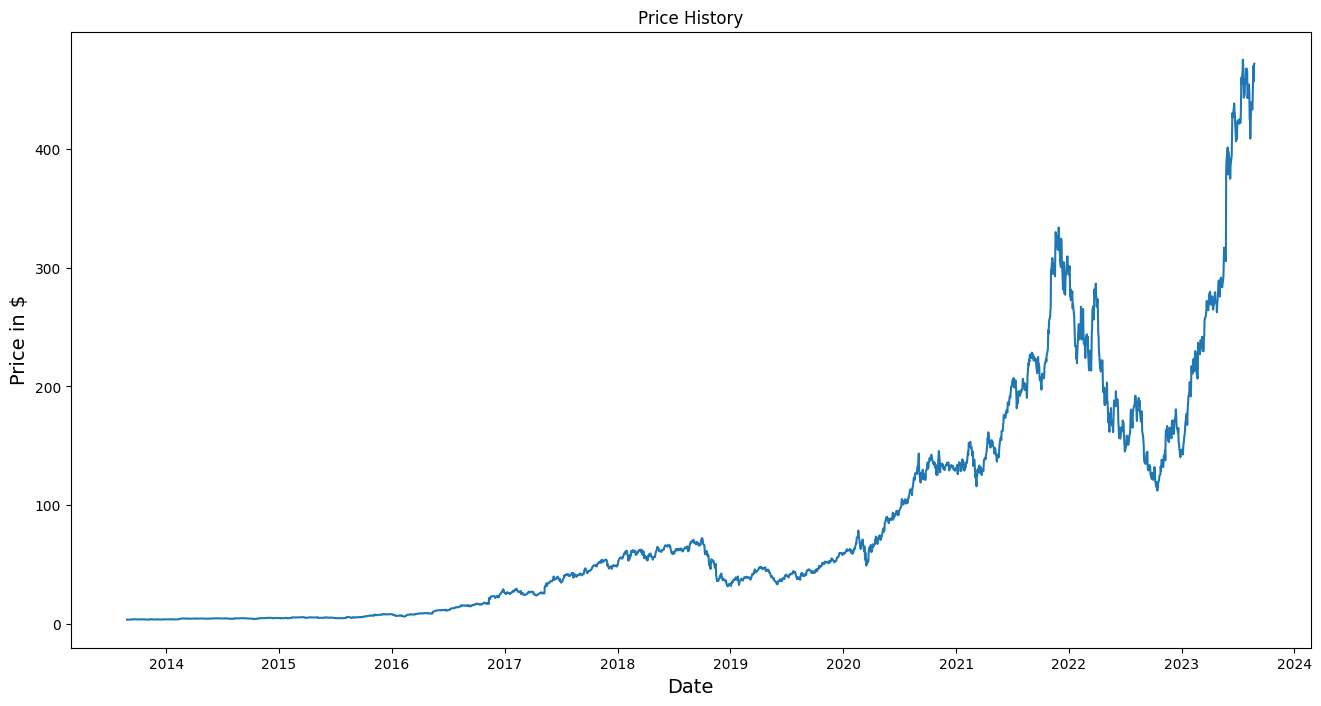

In [35]:
# Visualization

plt.figure(figsize=(16,8))
plt.title("Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price in $', fontsize=14)
plt.show()

In [36]:
# Creating a new Dataframe

data=df.filter(['Close'])
dataset = data.values

# Using 80% of the data for the training model
training_data_len = math.ceil(len(dataset)* .8)


In [37]:
#Scaling the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.32611220e-04],
       [1.32611220e-04],
       [1.16698016e-04],
       ...,
       [9.61256285e-01],
       [9.91979676e-01],
       [9.92976915e-01]])

In [38]:
#  Creating and splitting the training dataset

train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)


[array([0.00013261, 0.00013261, 0.0001167 , 0.00010609, 0.00011139,
       0.00018566, 0.00020687, 0.00017505, 0.00030766, 0.0004774 ,
       0.00061532, 0.00061001, 0.00066306, 0.00066836, 0.00069488,
       0.00076914, 0.00073201, 0.00065775, 0.00057819, 0.00061001,
       0.00062062, 0.0005941 , 0.00054636, 0.00053575, 0.00053044,
       0.00052514, 0.00044027, 0.00055166, 0.00055166, 0.0004827 ,
       0.0003554 , 0.00044557, 0.00037662, 0.00049862, 0.00045618,
       0.00055697, 0.00057288, 0.00066836, 0.00068958, 0.00064714,
       0.00050392, 0.00044557, 0.00036601, 0.00035009, 0.0003607 ,
       0.0003554 , 0.00033948, 0.00037662, 0.00014322, 0.00013261,
       0.00018566, 0.        , 0.00053575, 0.00060471, 0.00062062,
       0.00084871, 0.00088584, 0.00085932, 0.00065245, 0.0004721 ])]
[0.0003500935408044742]
[array([0.00013261, 0.00013261, 0.0001167 , 0.00010609, 0.00011139,
       0.00018566, 0.00020687, 0.00017505, 0.00030766, 0.0004774 ,
       0.00061532, 0.00061001, 0.0

In [39]:
# Convering to numpy arrays and reshaping

x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1953, 60, 1)

In [41]:
# LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [42]:
# Build the Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
# Train the Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1953/1953 [==============================] - 23s 11ms/step - loss: 2.5249e-04


In [44]:
#Create Test Set which is a new array containing scaled values from index 1953 to 2516
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])



In [45]:
#once again converting to numpy array
x_test = np.array(x_test)

In [46]:
#once again reshape to 3d
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [47]:
# get predictions from the model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 8ms/step


In [48]:
# get RMSE (root mean squared error) for accuracy of the model
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.1917149750423242

C:\Users\franl\AppData\Local\Temp\ipykernel_11208\3434811193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


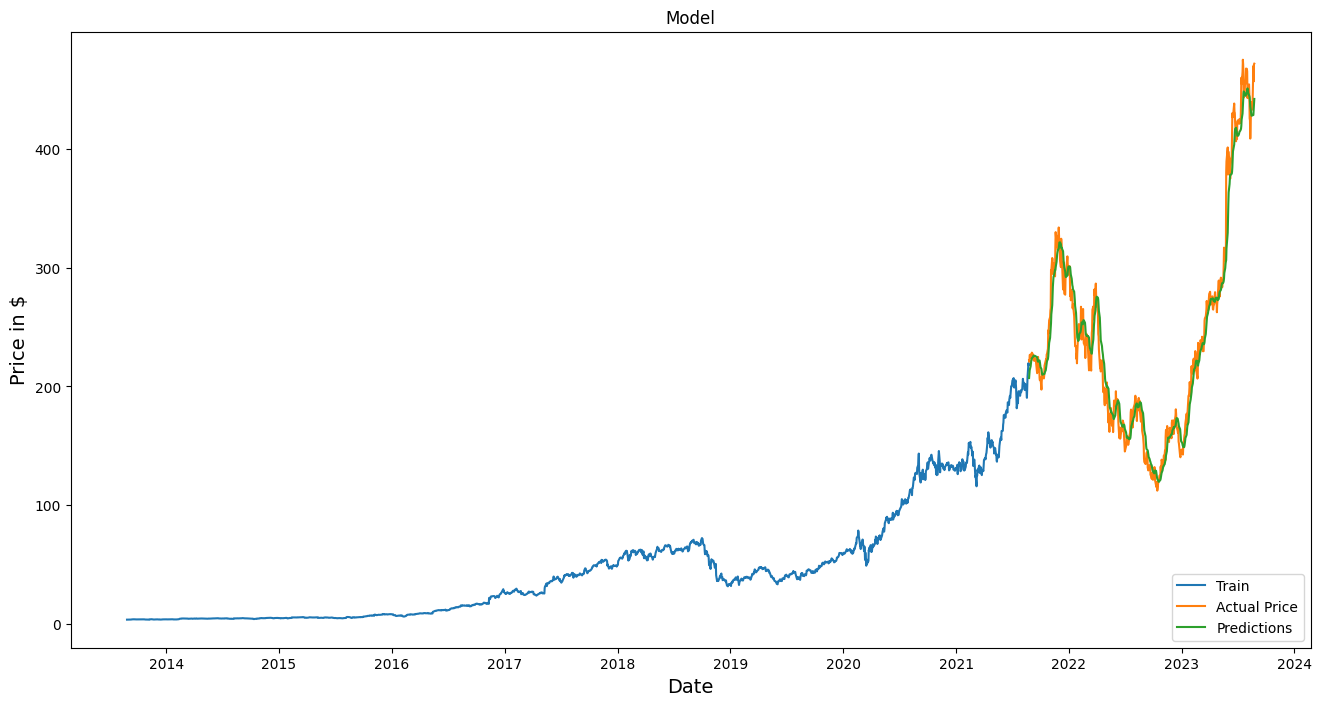

In [52]:
# plotting

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price in $', fontsize=14)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Price', 'Predictions'], loc='lower right')
plt.show()

In [50]:
# close price and predictions
valid

,Close,Predictions
Date,,
2021-08-25,222.130005,207.055115
2021-08-26,220.679993,210.683105
2021-08-27,226.360001,213.750916
2021-08-30,226.880005,216.860535
2021-08-31,223.850006,219.634521
...,...,...
2023-08-18,432.989990,428.272522
2023-08-21,469.670013,428.369965
2023-08-22,456.679993,432.936005
